In [ ]:
import numpy as np

# Code a simple neural network with one hidden layer

<img src="http://cocl.us/neural_network_example" alt="Neural Network Example" width="600px">


In [6]:
#randomly create weights and biases
#np.around rounds the values to 2 decimal places

weights = np.around(np.random.uniform(size=6), decimals=2) # 6 weights
biases = np.around(np.random.uniform(size=3), decimals=2) # 3 biases
print(weights, biases)

#randomly create inputs

x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

print('x1 is {} and x2 is {}'.format(x_1, x_2))

#calculate the output of the first node of the hidden layer Z11
Z_11 = x_1 * weights[0] + x_2 * weights[1] + biases[0]

print('The weighted sum of the inputs at the first node in the hidden layer is {}'.format(Z_11))

Z_12 = x_1 * weights[2] + x_2 * weights[3] + biases[1]

print('The weighted sum of the inputs at the second node in the hidden layer is {}'.format(Z_12))

[0.78 0.33 0.76 0.29 0.82 0.39] [0.6  0.15 0.91]
x1 is 0.5 and x2 is 0.85
The weighted sum of the inputs at the first node in the hidden layer is 1.2705000000000002
The weighted sum of the inputs at the second node in the hidden layer is 0.7765


In [8]:
# compute activation for the first node a11 in the hidden layer 
# using sigmoid function as the activation function
# np.exp(-Z_11) gives us euler's number raised to the power of Z_11

a_11 = 1.0 / (1.0 + np.exp(-Z_11))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))

a_12 = 1.0 / (1.0 + np.exp(-Z_12))

print('The activation of the second node in the hidden layer is {}'.format(np.around(a_12, decimals=4)))

The activation of the first node in the hidden layer is 0.7808
The activation of the second node in the hidden layer is 0.6849


In [10]:
# calculate the weighted sum of the inputs at the output layer
z_2 = a_11 * weights[4] + a_12 * weights[5] + biases[2]

print('The weighted sum of the inputs at the output layer is {}'.format(np.around(z_2, decimals=4)))

The weighted sum of the inputs at the output layer is 1.8174


In [11]:
# calculate the output of the network

a_2 = 1.0 / (1.0 + np.exp(-z_2))

print('The output of the network for x1 = 0.5 and x2 = 0.85 is {}'.format(np.around(a_2, decimals=4)))

The output of the network for x1 = 0.5 and x2 = 0.85 is 0.8603


In [ ]:
# Code a neural network which takes n inputs, with many hidden layers having m nodes each
# and an output layer

<img src="http://cocl.us/general_neural_network" alt="Neural Network General" width="600px">


In [39]:
n = 5 # number of inputs
num_hidden_layers = 3 # number of hidden layers
m = [3,2,3] # number of nodes in each hidden layer
num_nodes_output = 1 # number of nodes in the output layer

def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):

    num_nodes_previous = num_inputs # number of nodes in the previous layer
    network = {} # initialize network as an empty dictionary

    #initialize weights and biases in the network using random numbers

    for layer in range(num_hidden_layers + 1):
        if layer == num_hidden_layers: # we are in the output layer
            layer_name = 'output'
            num_nodes = num_nodes_output # only one node in the output layer
        else:
            layer_name = 'layer_{}'.format(layer + 1) # hidden layers
            num_nodes = m[layer]
        
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node + 1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2)
            }
        
        num_nodes_previous = num_nodes
    return (network)

neural_network = initialize_network(n, num_hidden_layers, m, num_nodes_output)
print(neural_network)

{'layer_1': {'node_1': {'weights': array([0.27, 0.2 , 0.98, 0.34, 0.42]), 'bias': array([0.76])}, 'node_2': {'weights': array([0.08, 0.36, 0.64, 0.3 , 0.24]), 'bias': array([0.83])}, 'node_3': {'weights': array([0.91, 0.83, 0.58, 0.7 , 0.81]), 'bias': array([0.85])}}, 'layer_2': {'node_1': {'weights': array([0.9 , 0.82, 0.44]), 'bias': array([0.11])}, 'node_2': {'weights': array([0.16, 0.32, 0.49]), 'bias': array([0.82])}}, 'layer_3': {'node_1': {'weights': array([0.85, 0.74]), 'bias': array([0.03])}, 'node_2': {'weights': array([0.75, 0.6 ]), 'bias': array([0.33])}, 'node_3': {'weights': array([0.01, 0.09]), 'bias': array([0.23])}}, 'output': {'node_1': {'weights': array([0.74, 0.29, 0.08]), 'bias': array([0.14])}}}


In [40]:
layer_positions = {}
layer = 0
for x in neural_network.items():
    layer_positions[x[0]] = layer
    layer += 1
print(layer_positions)


{'layer_1': 0, 'layer_2': 1, 'layer_3': 2, 'output': 3}


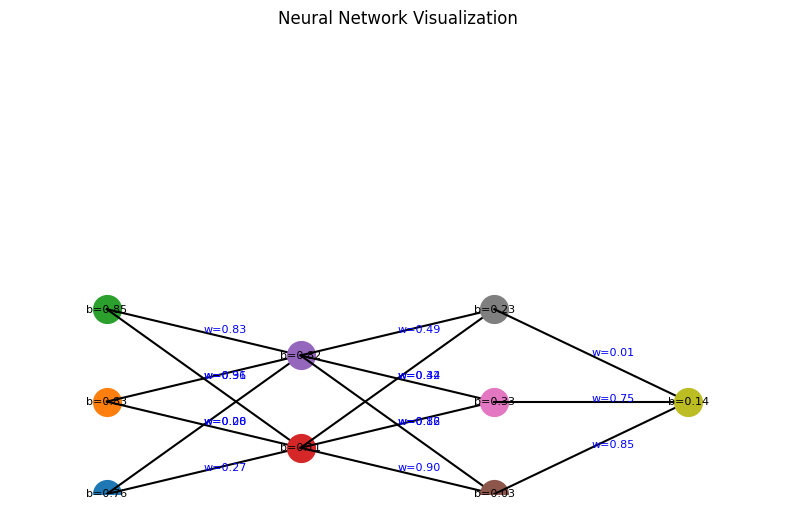

In [41]:
import matplotlib.pyplot as plt

# Neural network structure
neural_network

# Visualization parameters
layer_sizes = {layer: len(neural_network[layer]) for layer in neural_network}

def plot_neural_network(nn):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(-0.5, len(nn) - 0.5)
    ax.set_ylim(-1, max(layer_sizes.values()) + 1)

    # Loop through each layer
    for i, (layer_name, layer_nodes) in enumerate(nn.items()):
        x = layer_positions[layer_name]  # X position of the layer
        layer_node_count = len(layer_nodes)

        # Plot nodes in the layer
        for j, (node_name, node_info) in enumerate(layer_nodes.items()):
            y = j - (layer_node_count - 1) / 2  # Y position for nodes
            ax.plot(x, y, 'o', markersize=20, label=f'{layer_name}_{node_name}')

            # Annotate node with bias
            bias = node_info['bias'][0]
            ax.text(x, y, f"b={bias:.2f}", fontsize=8, ha='center', va='center')

            # Draw connections
            if i < len(nn) - 1:  # Skip output layer
                next_layer_name = list(nn.keys())[i + 1]
                next_layer = nn[next_layer_name]
                next_layer_node_count = len(next_layer)

                for k, next_node_name in enumerate(next_layer.keys()):
                    next_y = k - (next_layer_node_count - 1) / 2  # Y for next layer
                    weight = node_info['weights'][k]  # Connection weight

                    # Draw line with weight annotation
                    ax.plot([x, x + 1], [y, next_y], 'k-')
                    ax.text((x + x + 1) / 2, (y + next_y) / 2,
                            f"w={weight:.2f}", fontsize=8, color='blue')

    # Finalize plot
    ax.axis('off')
    plt.title("Neural Network Visualization")
    plt.show()

# Plot the neural network
plot_neural_network(neural_network)

In [57]:
# Compute weighted sum at each node
def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

# Generate 5 random inputs for the network
inputs = np.around(np.random.uniform(size=n), decimals=2)

print('The inputs to the network are {}'.format(inputs))

The inputs to the network are [0.79 0.3  0.93 0.89 0.72]


In [58]:
# Compute the weighted sum at the first node in the first hidden layer
# Each node contains it's bias and the weights for each input

node_weights = neural_network['layer_1']['node_1']['weights']
node_bias = neural_network['layer_1']['node_1']['bias']

weighted_sum = compute_weighted_sum(inputs, node_weights, node_bias)
print('The weighted sum at the first node in the hidden layer is {}'.format(np.around(weighted_sum[0], decimals=4)))


The weighted sum at the first node in the hidden layer is 2.5497


In [60]:
# Use sigmoid function to create an activation function
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))

#First nodes output
node_activation(weighted_sum)
print('Node output is {}'.format(np.around(node_activation(weighted_sum[0]), decimals=4)))



Node output is 0.9276


In [65]:
# Forward propagation of the inputs through the network

def forward_propagate(network, inputs):
    layer_inputs = list(inputs)  # Start with the input layer as the input to the first hidden layer

    for layer in network:
        layer_data = network[layer]
        layer_outputs = []  # Output of the current layer

        for layer_node in layer_data:
            node_data = layer_data[layer_node]

            # Compute the weighted sum and the output of each node at the same time
            node_output = node_activation(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))

        if layer != 'output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))

        layer_inputs = layer_outputs  # Set the output of this layer as the input to next layer

    network_predictions = layer_outputs
    return network_predictions

predictions = forward_propagate(neural_network, inputs)
print('The predicted values by the network are {}'.format(np.around(predictions[0], decimals=4)))

The outputs of the nodes in hidden layer number 1 is [0.9276, 0.8845, 0.9724]
The outputs of the nodes in hidden layer number 2 is [0.8907, 0.8491]
The outputs of the nodes in hidden layer number 3 is [0.8046, 0.8187, 0.5782]
The predicted values by the network are 0.7348


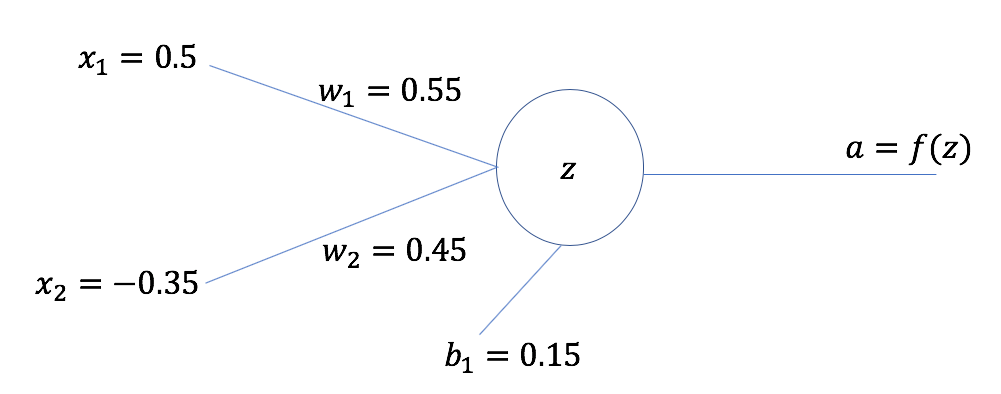

In [88]:
#Calculate the output of the node (a)

inputs2 = np.array([0.5,-0.35])
weights2 = np.array([0.55, 0.45])
bias = 0.15
z = compute_weighted_sum(inputs2,weights2,bias)
print('z: {}'.format(np.around(z,decimals=2)))
print('a = f(z): {}'.format(np.around(node_activation(z),decimals=2)))

z: 0.27
a = f(z): 0.57
